<a href="https://colab.research.google.com/github/levidasilvalima/RNA-PP1/blob/master/RedesNeuraisArtificiais_Projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# IMPORTAÇÕES

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
# import plotly.graph_objs as go
import plotly.graph_objects as go

In [2]:
# CRIAÇÃO DO DRIVE

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [26]:
# iMPORTAR CSV

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Manaus.csv', sep=';', encoding='ISO-8859-1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12,15,22,24,30,31,32,33,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
# TÓPICO - 2..1 Visão Geral dos Casos Confirmados

filter = df['_classificacao'] == "Confirmado"
df = df[filter] # Filtrar por casos confirmados
print(df.columns.size, "Valores descrevem cada exemplo")
print("Sendo eles: \n", df.columns.values)

print("\nEm manaus há", len(df), "casos confirmados")

ordered = df.sort_values(by='_dt_notificacao', ascending=True)
notNullFilter = pd.notnull(ordered["_dt_notificacao"]) 
ordered = ordered[notNullFilter]
initialDate = ordered.head(1)['_dt_notificacao'].values[0]
endDate = ordered.iloc[::-1].head(1)['_dt_notificacao'].values[0]
print("\nO periodo de tempo da base de dados vai de", initialDate, "a", endDate)


36 Valores descrevem cada exemplo
Sendo eles: 
 ['_idade' '_faixa etária' '_sexo' '_bairro' '_classificacao'
 '_comorb_renal' '_comorb_diabetes' '_comorb_imuno' '_comorb_cardio'
 '_conclusao' '_dt_notificacao' '_taxa' '_dt_evolucao' '_raca'
 '_dt_sintomas' '_criterio' '_tipo_teste' '_sintoma_garganta'
 '_sintoma_dispneia' '_sintoma_febre' '_sintoma_tosse' '_sintoma_outros'
 '_etnia' '_profiss_saude' '_srag' '_se_notificacao' '_distrito'
 '_bairro_mapa' '_comorb_respiratoria' '_comorb_cromossomica'
 '_comorb_hepatica' '_comorb_neurologica' '_comorb_hemato'
 '_comorb_obessidade' '_origem' '_evolução']

Em manaus há 36671 casos confirmados

O periodo de tempo da base de dados vai de 01/04/2020 a 31/07/2020


Apos a limpesa e organização do dataset, há 4610 exemplos descritos por 10 atributos cada

A porcentagem de recuperados é de 55.86 % do todo



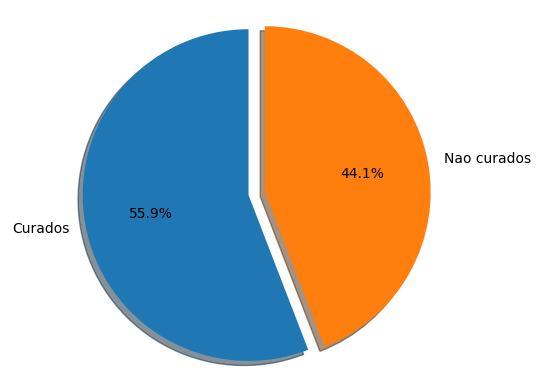


Casos acometidos mais a individuos do sexo masculino



In [73]:
# # Limpando dataset

# df = df.drop(columns=['_comorb_renal', 
#                       '_comorb_diabetes', 
#                       '_comorb_imuno', 
#                       '_comorb_cardio', 
#                       '_comorb_respiratoria', 
#                       '_comorb_cromossomica', 
#                       '_comorb_hepatica', 
#                       '_comorb_neurologica', 
#                       '_comorb_hemato', 
#                       '_comorb_obessidade']) # Apagar atributos relativos a comorbidades
# df = df.drop(columns=['_sintoma_garganta', 
#                       '_sintoma_dispneia', 
#                       '_sintoma_febre', 
#                       '_sintoma_tosse', 
#                       '_sintoma_outros']) # Apagar atributos relativos a sintomas
# df = df.drop(columns=['_etnia', '_raca']) # Apagar atributos relativos a etnia
# df = df.drop(columns=['_profiss_saude']) # Apagar atributos relativos a profissao
# df = df.drop(columns=['_dt_evolucao',
#                       '_dt_sintomas']) # Apagar atributos data exceto a de notificação
# df = df.drop(columns=['_origem']) # Apagar atributos relativos a origem
# df = df.drop(columns=[ '_tipo_teste',
#                       '_evolução',
#                       '_bairro',
#                       '_bairro_mapa',
#                       '_criterio']) # Apagar atributos desnecessarios
# df = df.dropna(subset=df.columns.values) # Apagar linhas com atributos nulos

print("Apos a limpesa e organização do dataset, há", len(df), "exemplos descritos por", len(df.columns.values), "atributos cada\n")

filterRecovered = df['_conclusao'] == "Recuperado" # Filtrar por casos recuperados
dfRecovered = df[filterRecovered]
percent = round((len(dfRecovered)/len(df))*100, 2)
print("A porcentagem de recuperados é de", percent, "% do todo\n")
labels = 'Curados', 'Nao curados'
sizes = [percent, 100-percent] 
explode = (0.1, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)  
ax1.axis('equal')  
plt.show()

filterWomen = df['_sexo'] == "F" # Filtrar por individuos mulher
qtdDfWomen = len(df[filterWomen])
filterMen = df['_sexo'] == "M" # Filtrar por individuos homem
qtdDfmen = len(df[filterMen])
print ("\nCasos acometidos mais a individuos do sexo masculino\n" if qtdDfmen>qtdDfWomen else "Casos acometidos mais a individuos do sexo feminino\n")
fig = go.Figure()
fig.add_trace(go.Bar(x=['Masculino', 'Feminino'],y=[qtdDfmen,qtdDfWomen ]))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,)
fig.show()